# GRIP - THE SPARKS FOUNDATION

### BY - Sunanda Mahanta

## TASK 5 - Exploratory Data Analysis - Sports 
1. Perform ‘Exploratory Data Analysis’ on dataset  ‘Indian Premier League’ 
2. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 
3. Suggest teams or players a company should endorse for its products

## STEP 1 :  Import all Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

## STEP 2 : Reading & Understanding Data

In [2]:
#Loading the match dataset
match = pd.read_csv(r"C:\Users\Nmahanta\Downloads\matches.csv")
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Above dataset gives detail about the IPL teams, winner, umpires and venue. 

In [3]:
#Loading the deliveries dataset
deliveries = pd.read_csv(r"C:\Users\Nmahanta\Downloads\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Above dataset gives detail about the matches, runs scored in each ball,outs,batsman,bowlers.

In [4]:
#Number of rows & columns in each dataset
print("Number of rows and columns in match dataset :",match.shape)
print("Number of rows and columns in deliveries dataset :",deliveries.shape)


Number of rows and columns in match dataset : (756, 18)
Number of rows and columns in deliveries dataset : (179078, 21)


In [5]:
#Data types of 'match' dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#Data types of deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
#Summary of Numerical columns of 'match' dataset
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
#Summary of Categorical columns of 'match' dataset
match[['city','team1','team2','toss_winner','toss_decision','winner','player_of_match','venue']].describe()

,city,team1,team2,toss_winner,toss_decision,winner,player_of_match,venue
count,749,756,756,756,756,752,752,756
unique,32,15,15,15,2,15,226,41
top,Mumbai,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,CH Gayle,Eden Gardens
freq,101,101,95,98,463,109,21,77


In [9]:
#Summary of Numerical columns of 'deliveries' dataset
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
#Summary of Categorical columns of 'deliveries' dataset
deliveries[['batting_team','bowling_team','batsman','non_striker','bowler']].describe()

,batting_team,bowling_team,batsman,non_striker,bowler
count,179078,179078,179078,179078,179078
unique,15,15,516,511,405
top,Mumbai Indians,Mumbai Indians,V Kohli,SK Raina,Harbhajan Singh
freq,22619,22517,4211,4173,3451


### Check for duplicate values

In [11]:
print(match.duplicated(subset='id').sum())
print(deliveries.duplicated(subset='match_id').sum())

0
178322


##### 'deliveries' dataset has so many duplicate values, because it contains details of each ball of each year. 

### Check for Missing values

In [12]:
#Percentage of Missing values in 'match' dataset
round(100*(match.isnull().sum()/len(match)),2)

id                  0.00
season              0.00
city                0.93
date                0.00
team1               0.00
team2               0.00
toss_winner         0.00
toss_decision       0.00
result              0.00
dl_applied          0.00
winner              0.53
win_by_runs         0.00
win_by_wickets      0.00
player_of_match     0.53
venue               0.00
umpire1             0.26
umpire2             0.26
umpire3            84.26
dtype: float64

In [13]:
#Percentage of Missing values in 'deliveries' dataset
round(100*(deliveries.isnull().sum()/len(deliveries)),2)

match_id             0.00
inning               0.00
batting_team         0.00
bowling_team         0.00
over                 0.00
ball                 0.00
batsman              0.00
non_striker          0.00
bowler               0.00
is_super_over        0.00
wide_runs            0.00
bye_runs             0.00
legbye_runs          0.00
noball_runs          0.00
penalty_runs         0.00
batsman_runs         0.00
extra_runs           0.00
total_runs           0.00
player_dismissed    95.07
dismissal_kind      95.07
fielder             96.40
dtype: float64

### Check for unique values

In [14]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### There are two teams 'Rising Pune Supergiant' and 'Rising Pune Supergiants', which are the same team, but there are two different levels because of spelling error. So replacing one with the other using the correct name.

In [17]:
match.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

## STEP 3 : Exploratory Data Analysis

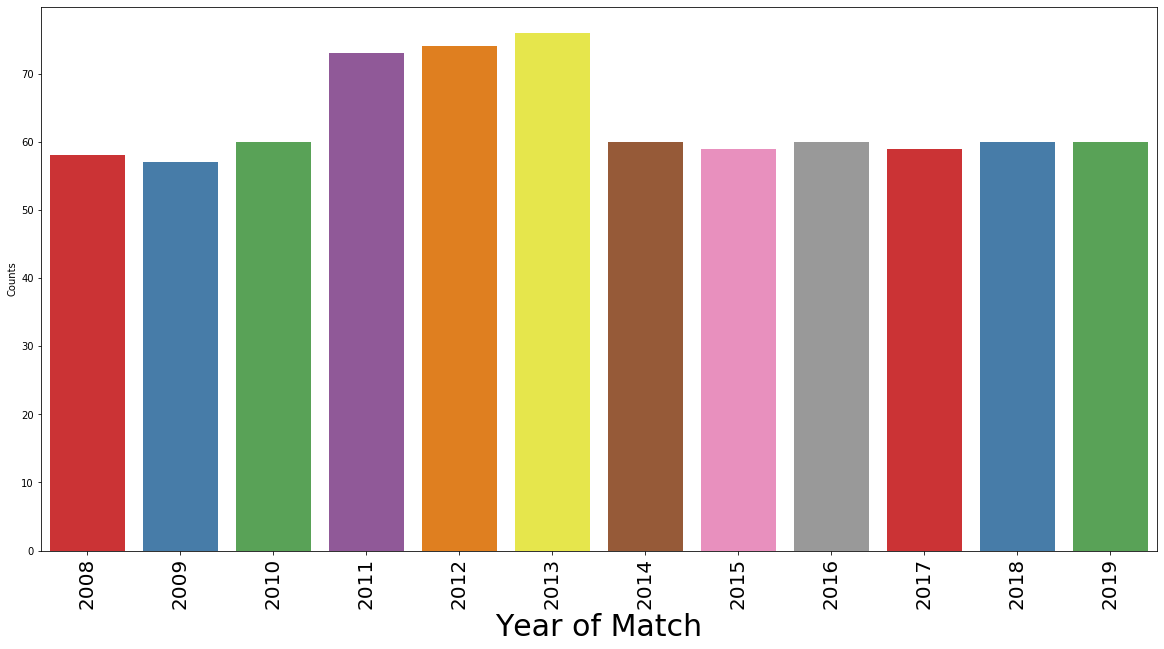

In [18]:
#winner
plt.figure(figsize=(20,10))
sns.countplot(match['season'],palette='Set1')
plt.xticks(rotation=90,fontsize=20)
plt.ylabel('Counts')
plt.xlabel('Year of Match',fontsize=30)
plt.show()

#### Maximum number of matches were played in the year 2013.

In [19]:
#Grouping City & Venue
Venue = match.groupby(['city', 'venue']).size().reset_index(name='Total Matches')
Venue = Venue.sort_values(by='Total Matches',ascending=False).head(30)
Venue.head()

,city,venue,Total Matches
26,Kolkata,Eden Gardens,77
31,Mumbai,Wankhede Stadium,73
13,Delhi,Feroz Shah Kotla,67
2,Bangalore,M Chinnaswamy Stadium,66
18,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",56


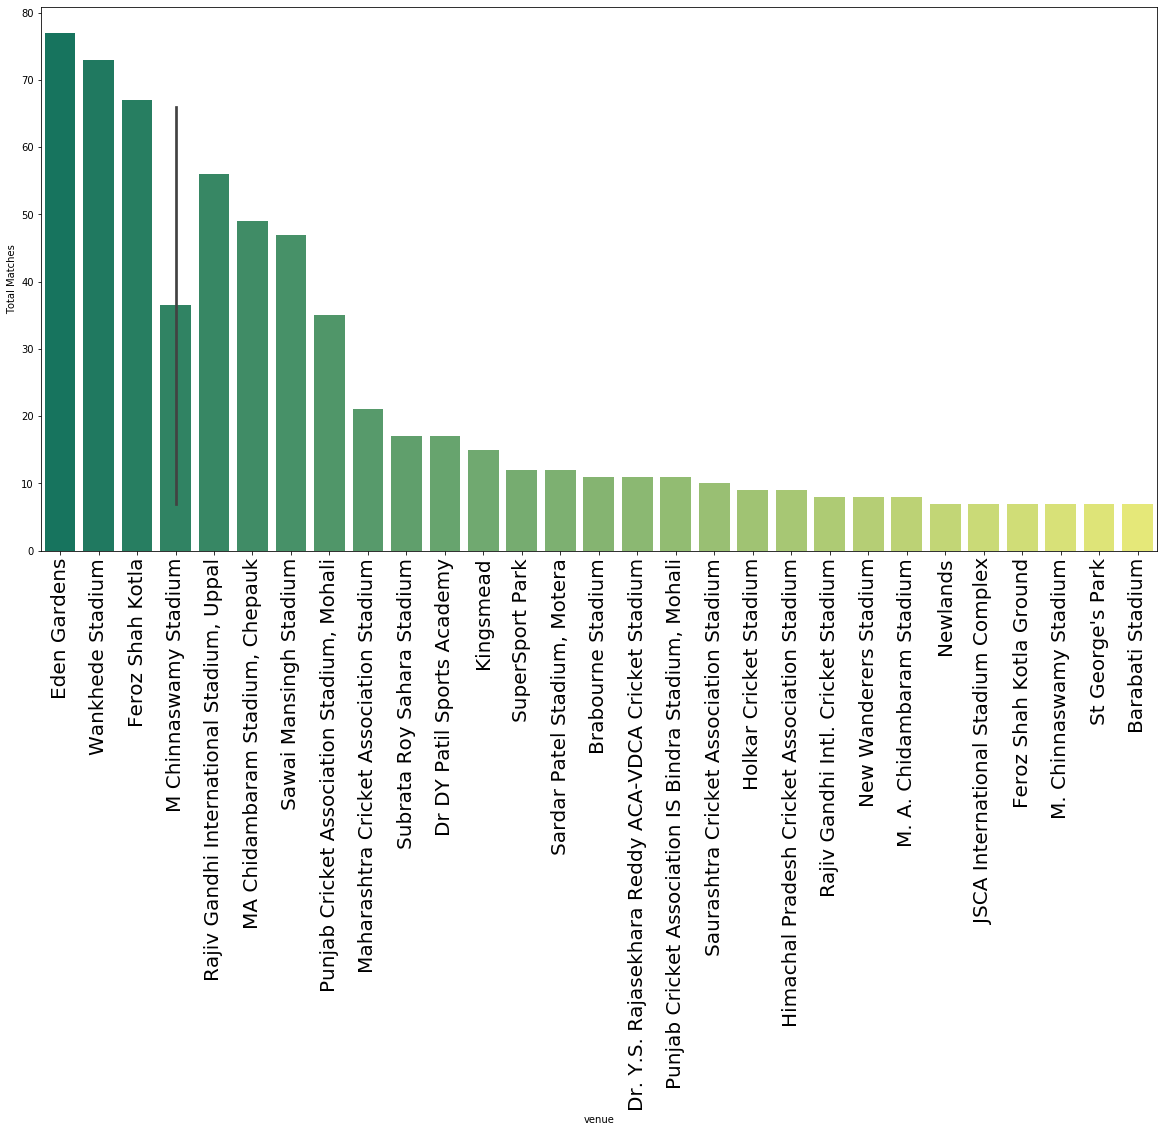

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x='venue',y='Total Matches',data=Venue.head(30),palette="summer")
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### Most of the matches were played at Eden Garden,Kolkata, followed by Wankhede Stadium,Mumbai.

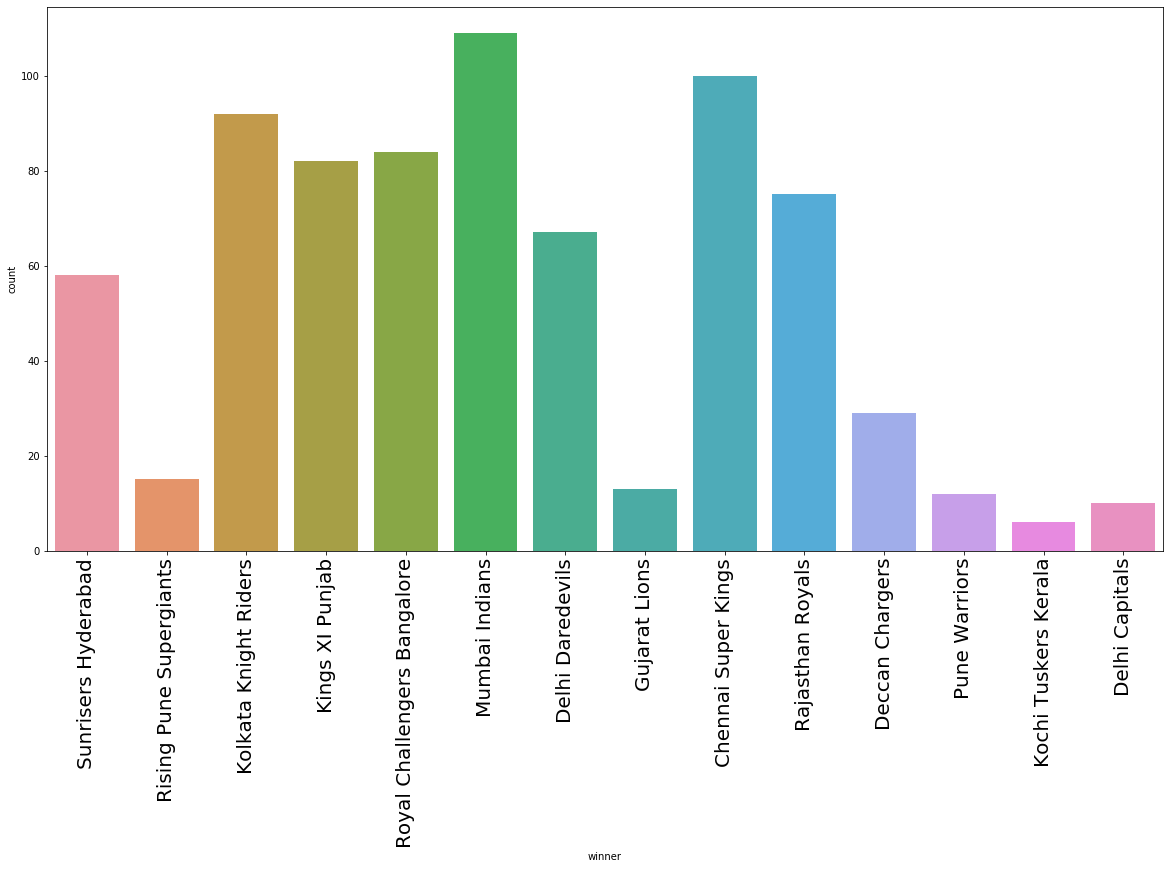

In [21]:
#winner
plt.figure(figsize=(20,10))
sns.countplot(match['winner'])
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### Most of the IPL matches were won by 'Mumbai Indians', followed by 'Chennai Super Kings' & 'Kolkata Knight Riders'.

In [22]:
#player of the match
df = match['player_of_match'].value_counts().head(10)
df.head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

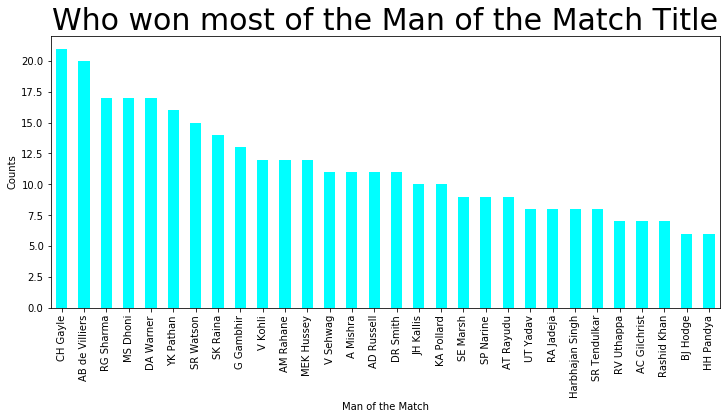

In [23]:
player = match['player_of_match'].value_counts().head(30)
player.plot(kind='bar',figsize=(12,5),stacked=True, color='aqua')
plt.title("Who won most of the Man of the Match Title",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Man of the Match')
plt.show()

#### 'CH Gayle' won most Man of the Match awards. After him, AB de Villiers,RG Sharma, MS Dhoni & DA Warner have awarded the most.

In [24]:
#toss_winner vs winner
win = 0
for index,value in match.iterrows():
    if (value['toss_winner']==value['winner']):
        win += 1
prob = round(win/len(match),2)
print('The probability of winning the match if the team won the toss is {}'.format(prob))

The probability of winning the match if the team won the toss is 0.52


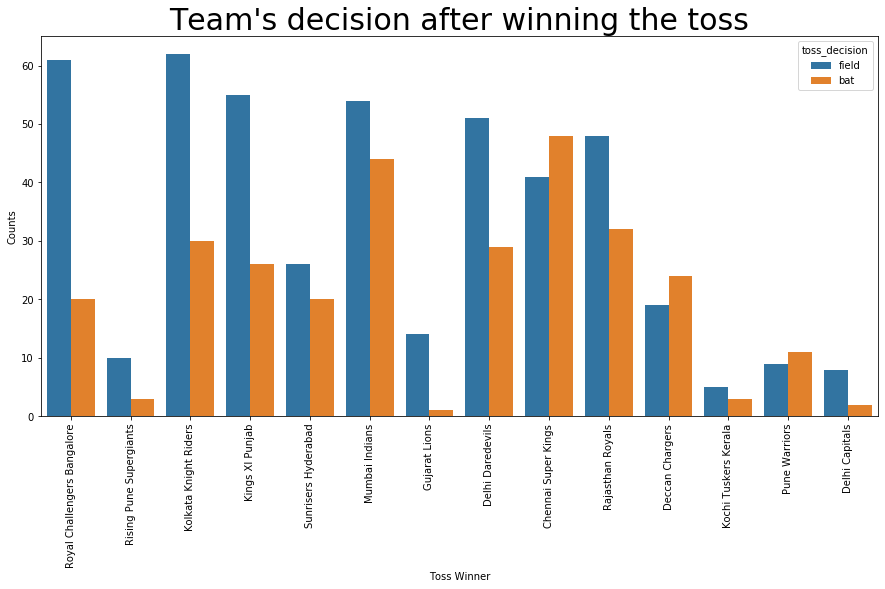

In [25]:
#toss_decision vs winner
plt.figure(figsize=(15,7))
sns.countplot('toss_winner',data=match,hue='toss_decision')
plt.title("Team's decision after winning the toss",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Toss Winner')
plt.show()

#### Most of the time the teams after wining the toss, choose fielding over batting.

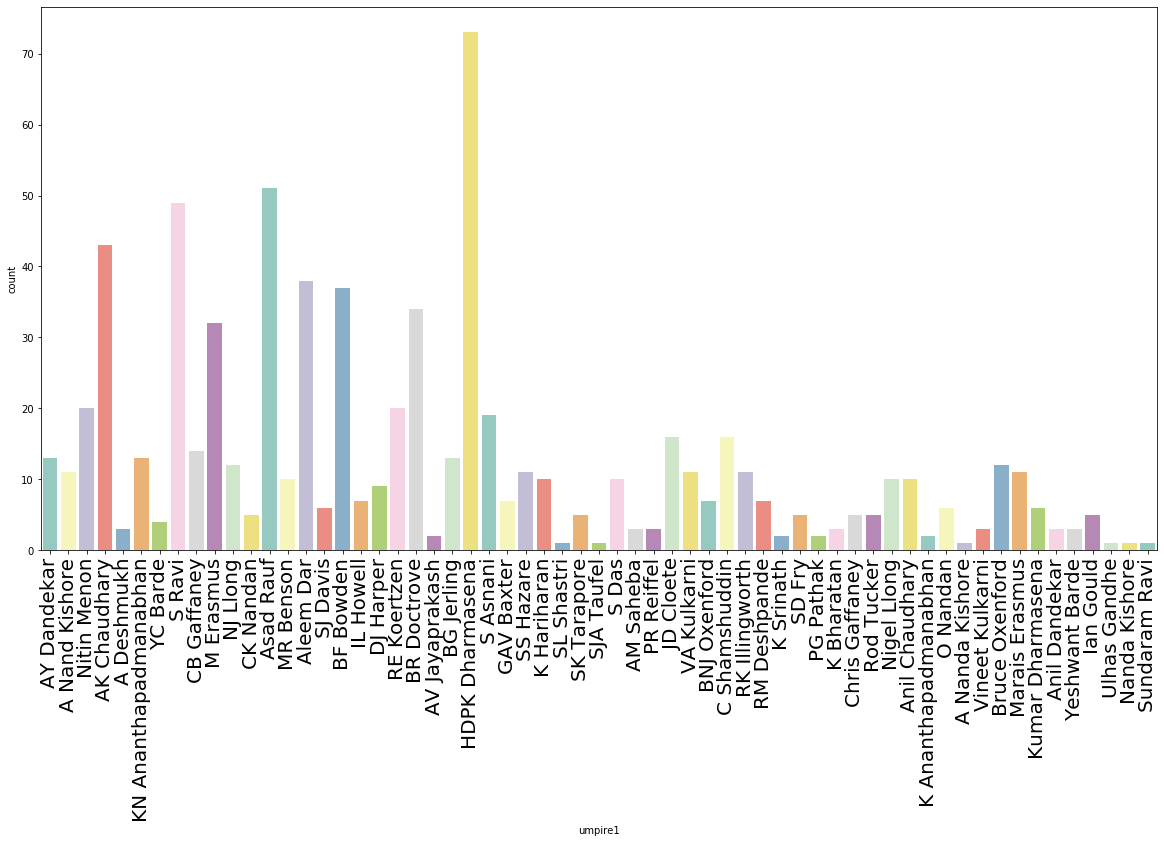

In [26]:
#umpire1
plt.figure(figsize=(20,10))
sns.countplot(x='umpire1',data=match,palette="Set3")
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### HDPK Dharmasena is the umpire1 in most of the seasons.

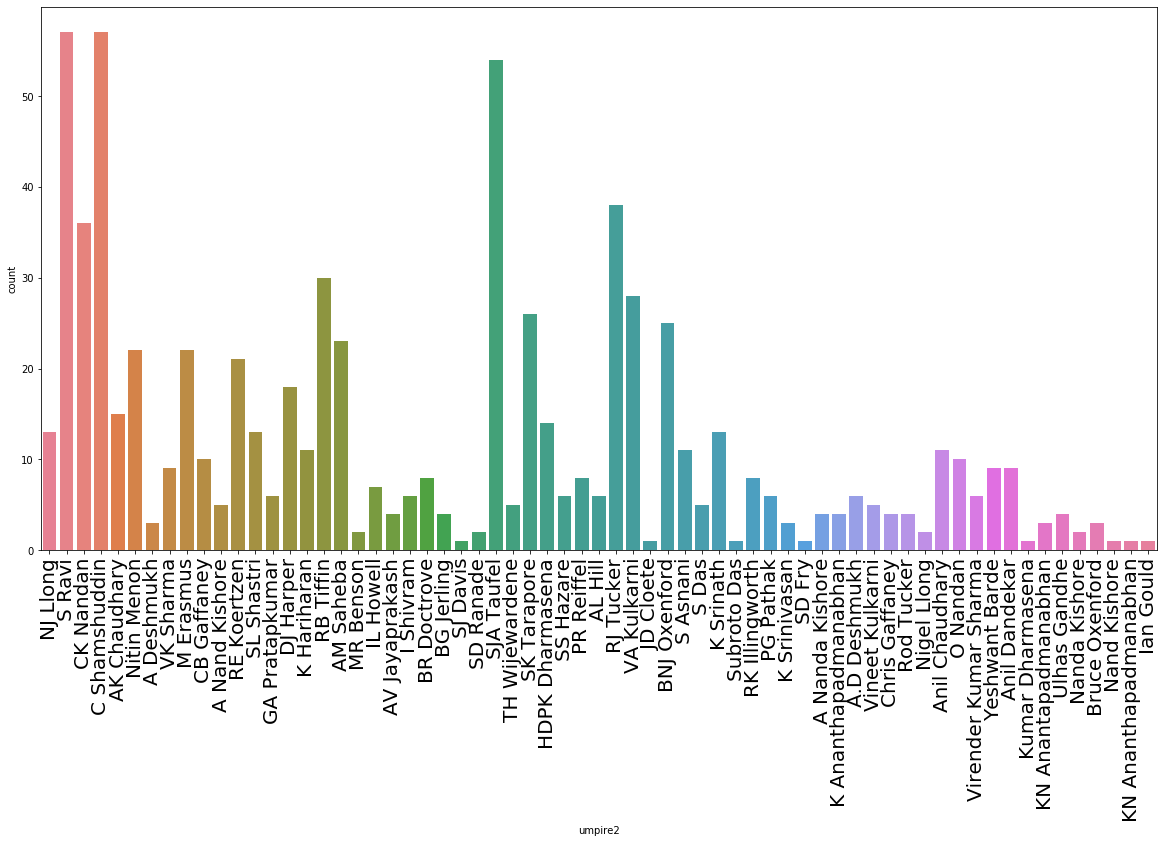

In [27]:
#umpire2
plt.figure(figsize=(20,10))
sns.countplot(x='umpire2',data=match,palette="husl")
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### S Ravi & C Shamshuddin were the 2nd umpire in most of the saesons.

In [28]:
#most runs scored
top_batsman = deliveries.groupby(['batsman'])
runs = top_batsman['batsman_runs'].sum().reset_index()
runs = runs.sort_values(by='batsman_runs',ascending=False)
runs.head()

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632


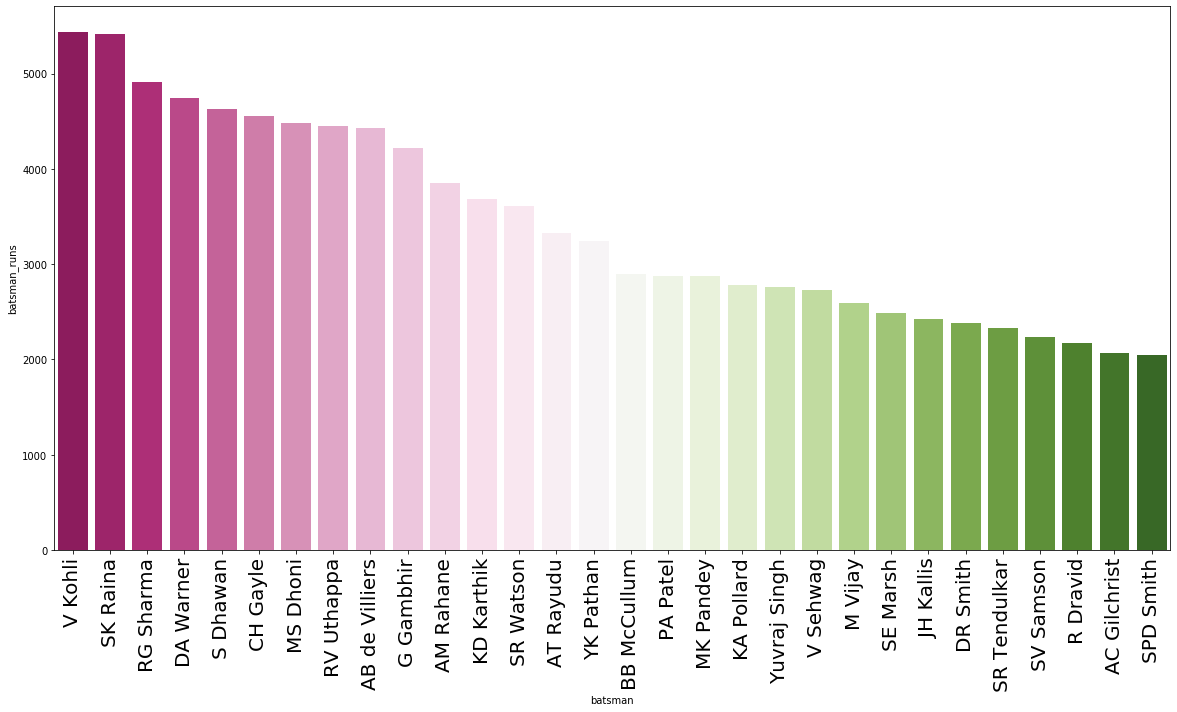

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='batsman',y='batsman_runs',data=runs.head(30),palette="PiYG")
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### 'Virat Kohli' is the highest scorer batsman.

In [30]:
bowling = deliveries.groupby(['bowling_team', 'bowler']).size().reset_index(name='Total Bowlings')
bowling = bowling.sort_values(by='Total Bowlings',ascending=False).head(30)
bowling.head()

,bowling_team,bowler,Total Bowlings
396,Mumbai Indians,Harbhajan Singh,2989
438,Mumbai Indians,SL Malinga,2974
364,Kolkata Knight Riders,SP Narine,2600
39,Chennai Super Kings,R Ashwin,2081
668,Sunrisers Hyderabad,B Kumar,2041


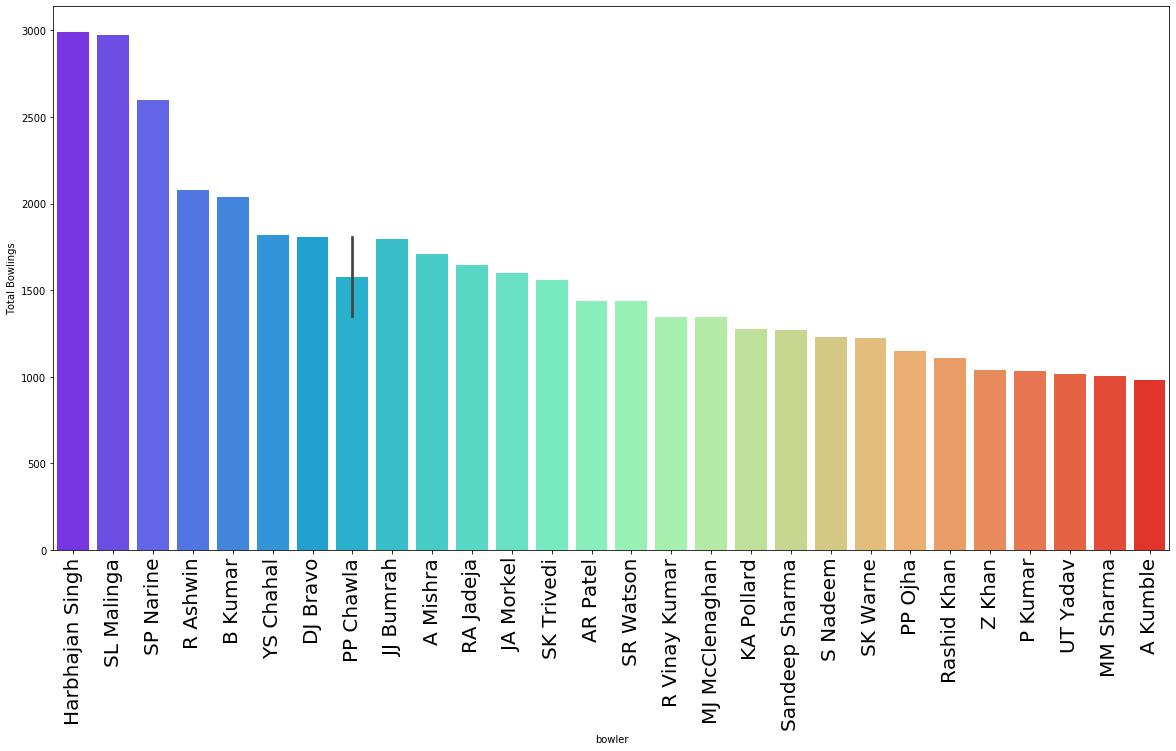

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='bowler',y='Total Bowlings',data=bowling.head(30),palette="rainbow")
plt.xticks(rotation=90,fontsize=20)
plt.show()

#### Harbhajan Singh & SL Malinga are considered to be the best bowler.

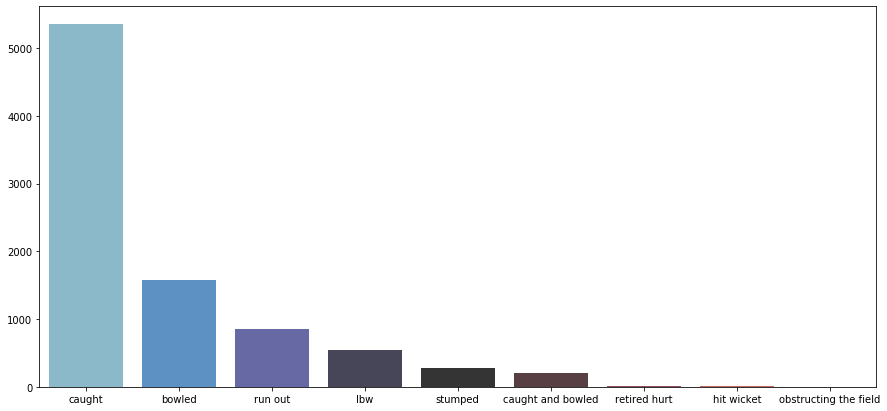

In [32]:
#type of wicket
wicket = deliveries['dismissal_kind'].value_counts()
ax=plt.subplots(figsize=(15,7))
sns.barplot(wicket.index,wicket.values,alpha=0.9,palette='icefire')
plt.show()

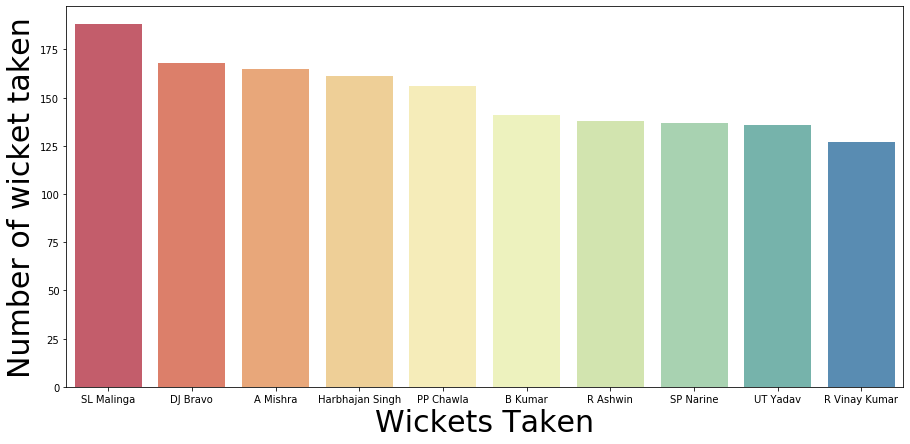

In [33]:
#most successful bowler
bowlers = deliveries[['bowler','dismissal_kind']]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers = bowlers.sort_values(by='dismissal_kind',ascending=False).head(10)
ax=plt.subplots(figsize=(15,7))
sns.barplot(bowlers['bowler'],bowlers['dismissal_kind'],alpha=0.9,palette='Spectral')
plt.xlabel('Wickets Taken',fontsize=30)
plt.ylabel('Number of wicket taken',fontsize=30)
plt.show()
#bowlers.head()

#### 'Malinga' is the best bowler in terms of wickets taken.

### CONCLUSION :
1. Mumbai Indians is the most successful team till now. Chennai Super Kings comes second and Kolkata Knight Riders comes third.
2. CH Gayle is the most awarded 'Man/Player of the Match'. AB de Villiers is the second highest awarded player.
3. Most of the IPL Matches were played at the Eden Garden Stadium,Kolkata. 
4. In most of the matches,after winning the toss, teams choose to field first over batting.
5. If a team wins the toss, then probability of that team winning the match is 52%.
6. Virat Kohli has scored highest in batting.
7. SL Malinga has taken highest number of wickets.
8. A company can endorse its products for Mumbai Indians and Chennai Super Kings teams. If they are looking for players, they can go for Virat Kohli, CH Gayle, YS Chahal, SJ Malinga.